In [25]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import pandas as pd
from rdkit.Chem import PandasTools

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plot
import matplotlib


Load the data

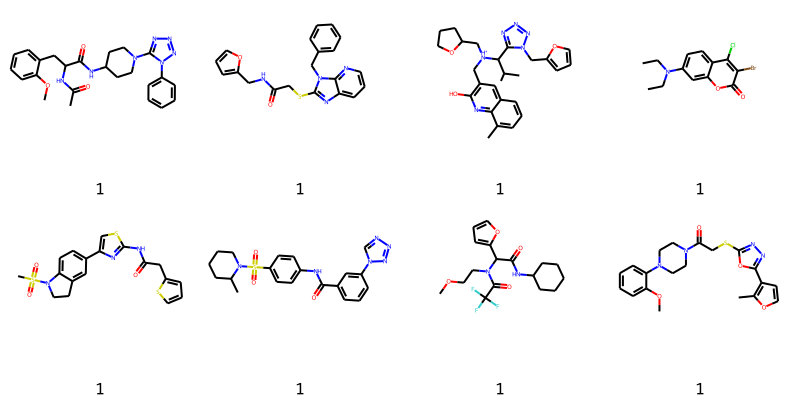

In [3]:
filepath = 'tested_molecules-1.csv'

esol_data = pd.read_csv(filepath)

PandasTools.AddMoleculeColumnToFrame(esol_data, smilesCol='smiles')

PandasTools.FrameToGridImage(esol_data.head(8), legendsCol="ALDH1_inhibition", molsPerRow=4)

Description of all the attributes:  https://www.rdkit.org/docs/RDKit_Book.html#additional-information-about-the-fingerprints

Add new attributes

,smiles,ALDH1_inhibition,ROMol,n_Atoms,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,...,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Heterocycles,AmideBonds,LipinskiHBA,LipinskiHBD
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1,,34,1.50330,34,8,10,2,463.542,...,6.958111e+07,-3.95,178,1,1,3,1,2,10,2
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1,,27,3.48110,27,6,7,1,378.457,...,3.137659e+06,-3.06,136,0,0,4,3,1,6,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1,,35,2.83782,35,8,9,2,477.589,...,1.436707e+08,-3.30,184,1,1,4,3,0,9,2
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1,,18,4.05510,18,3,5,0,330.609,...,1.207136e+04,-1.00,96,0,0,2,1,0,3,0
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1,,27,3.37490,27,6,9,1,419.553,...,1.948182e+06,-2.23,140,0,1,3,2,1,6,1

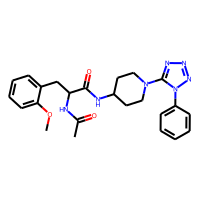
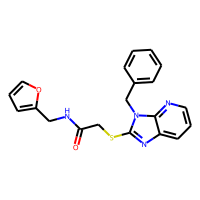
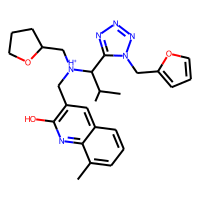
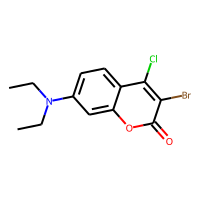
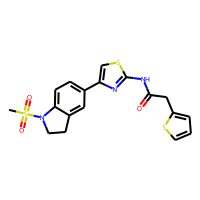

In [4]:
esol_data['n_Atoms'] = esol_data['ROMol'].map(lambda x: x.GetNumAtoms())
esol_data['MolLogP'] = esol_data['ROMol'].apply(Descriptors.MolLogP)
esol_data['HeavyAtomCount'] = esol_data['ROMol'].apply(Descriptors.HeavyAtomCount)
esol_data['HAccept'] = esol_data['ROMol'].apply(Descriptors.NumHAcceptors)
esol_data['Heteroatoms'] = esol_data['ROMol'].apply(Descriptors.NumHeteroatoms)
esol_data['HDonor'] = esol_data['ROMol'].apply(Descriptors.NumHDonors)
esol_data['MolWt'] = esol_data['ROMol'].apply(Descriptors.MolWt)
esol_data['RotableBonds'] = esol_data['ROMol'].apply(Descriptors.NumRotatableBonds)
esol_data['RingCount'] = esol_data['ROMol'].apply(Descriptors.RingCount)
esol_data['Ipc'] = esol_data['ROMol'].apply(Descriptors.Ipc)
esol_data['HallKierAlpha'] = esol_data['ROMol'].apply(Descriptors.HallKierAlpha)
esol_data['NumValenceElectrons'] = esol_data['ROMol'].apply(Descriptors.NumValenceElectrons)
esol_data['SaturatedRings'] = esol_data['ROMol'].apply(Descriptors.NumSaturatedRings)
esol_data['AliphaticRings'] = esol_data['ROMol'].apply(Descriptors.NumAliphaticRings)
esol_data['AromaticRings'] = esol_data['ROMol'].apply(Descriptors.NumAromaticRings)
esol_data['Heterocycles'] = esol_data['ROMol'].apply(Descriptors.NumAromaticHeterocycles)
esol_data['AmideBonds'] = [AllChem.CalcNumAmideBonds(x) for x in esol_data['ROMol']]
esol_data['LipinskiHBA'] = [AllChem.CalcNumLipinskiHBA(x) for x in esol_data['ROMol']]
esol_data['LipinskiHBD'] = [AllChem.CalcNumLipinskiHBD(x) for x in esol_data['ROMol']]

esol_data.head()


In [5]:
scaler = StandardScaler()

st_data = esol_data.copy().drop(['ROMol','smiles','ALDH1_inhibition'], axis=1)

st_data = (st_data - st_data.mean()) / st_data.std()

st_data.head()

,n_Atoms,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Heterocycles,AmideBonds,LipinskiHBA,LipinskiHBD
0,1.797123,-0.745378,1.797123,1.664185,1.452667,0.932897,1.513763,1.507489,1.055941,0.604526,-1.866199,1.796067,0.637231,0.270232,0.907581,0.166516,1.262925,2.084613,0.669387
1,0.523471,0.681899,0.523471,0.623744,0.109677,-0.195153,0.421064,1.052467,1.055941,-0.114505,-0.769899,0.335907,-0.655327,-0.837276,1.976580,2.597405,0.144302,0.104453,-0.273412
2,1.979074,0.217677,1.979074,1.664185,1.005004,0.932897,1.694161,1.962511,2.022036,1.406300,-1.065530,2.004662,0.637231,0.270232,1.976580,2.597405,-0.974320,1.589573,0.669387
3,-1.114082,1.096125,-1.114082,-0.936917,-0.785649,-1.323202,-0.193421,-0.767623,-0.876248,-0.148329,1.767606,-1.054723,-0.655327,-0.837276,-0.161419,0.166516,-0.974320,-1.380666,-1.216210
4,0.523471,0.605260,0.523471,0.623744,1.005004,-0.195153,0.948837,0.142422,1.055941,-0.127377,0.252494,0.474969,-0.655327,0.270232,0.907581,1.381961,0.144302,0.104453,-0.273412


Make decomposition

                          PC0       PC1       PC2       PC3       PC4  \
n_Atoms              0.351973  0.040911 -0.067709 -0.125142  0.059692   
MolLogP              0.082154 -0.269450 -0.259883 -0.462697  0.145015   
HeavyAtomCount       0.351973  0.040911 -0.067709 -0.125142  0.059692   
HAccept              0.263296 -0.122453  0.141839  0.437130 -0.011628   
Heteroatoms          0.281746  0.031144  0.216116  0.304215  0.079291   
HDonor               0.032138  0.311845  0.406359 -0.296660 -0.322753   
MolWt                0.341739  0.053886 -0.047483 -0.085202  0.104846   
RotableBonds         0.225931  0.038381  0.196198 -0.108227  0.398404   
RingCount            0.240695 -0.026406 -0.349113 -0.043926 -0.408010   
Ipc                  0.128295  0.078071 -0.140819 -0.081208 -0.082628   
HallKierAlpha       -0.277008  0.162836 -0.083722  0.146022  0.044180   
NumValenceElectrons  0.345916  0.090030 -0.056278 -0.094076  0.108052   
SaturatedRings       0.061535  0.399892 -0.345396  

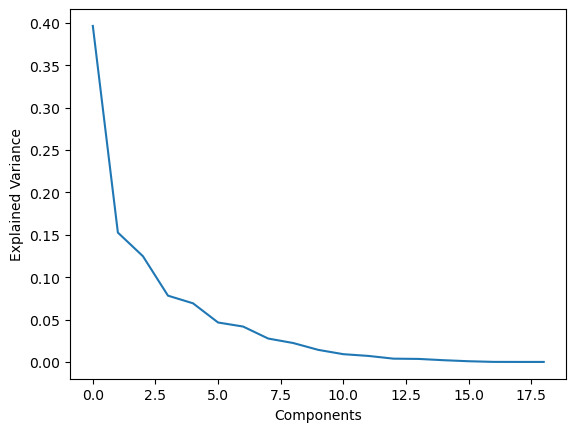

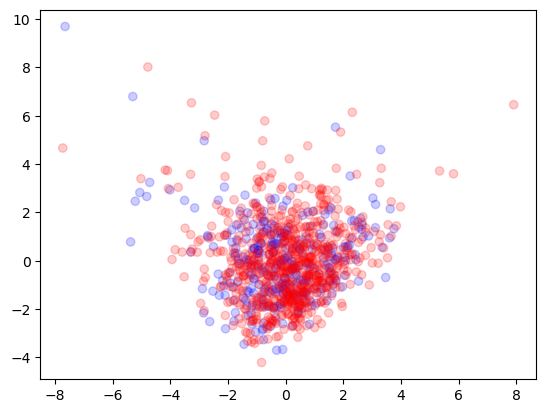

In [36]:
pca = PCA(n_components= st_data.shape[1])
components = pca.fit_transform(st_data)

loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(st_data.columns))],
index=st_data.columns)
print(loadings)


components_Df = pd.DataFrame(data = components)
components_Df['label'] = esol_data['ALDH1_inhibition']

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

colors = ['red', 'blue']

plot.scatter(components_Df[2], components_Df[1],
             c = components_Df['label'],
             cmap=matplotlib.colors.ListedColormap(colors),
             alpha= 0.2)



Project data onto principal components.